In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

from modules import gendata, SI_SeqFS_DA


Generate data

In [2]:
ns = 20
nt = 10
truebeta= [0, 0, 0]
p = len(truebeta)
print('true beta:', truebeta)

true_beta_s = np.full((p,1), 2) #source's beta
true_beta_t = np.array(truebeta).reshape((-1,1)) #target's beta

K = 2 # select k features
# generate data
Xs, Xt, Ys, Yt, Sigma_s, Sigma_t = gendata.generate(ns, nt, p, true_beta_s, true_beta_t)

true beta: [0, 0, 0]


### SI-SeqFS-DA with Forward Selection

In [3]:

list_p_value = []
alpha = 0.05  
rejected = 0
detected = 0

max_iteration = 200
iter = range(max_iteration)

list_p_value = []
for i in iter:
    # generate data
    Xs, Xt, Ys, Yt, Sigma_s, Sigma_t = gendata.generate(ns, nt, p, true_beta_s, true_beta_t)
    pvalue = SI_SeqFS_DA.SI_SeqFS_DA(Xs, Ys, Xt, Yt, K, Sigma_s, Sigma_t, method='forward', jth = None)
    list_p_value.append(pvalue)

for i in list_p_value:
    if i <= alpha:
        rejected += 1
    else:
        detected += 1
FPR = rejected / (rejected + detected)


False positive rate: 0.075
Uniform check (KS-Test result): 0.2853501377725741


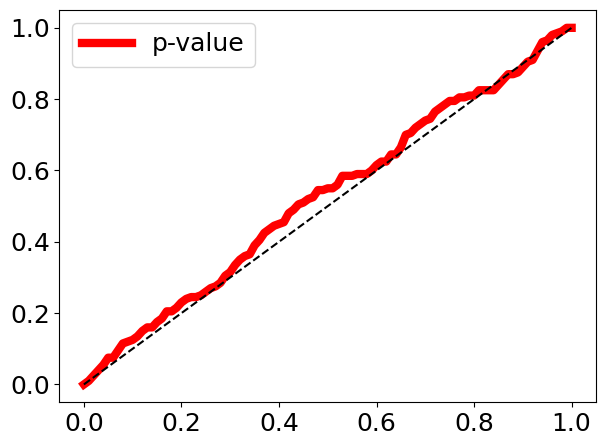

In [4]:
kstest = scipy.stats.kstest(list_p_value, 'uniform')
print(f"False positive rate: {FPR}")
print(f'Uniform check (KS-Test result): {kstest.pvalue}')

plt.rcParams.update({'font.size': 18})
grid = np.linspace(0, 1, 101)
plt.plot(grid, sm.distributions.ECDF(np.array(list_p_value))(grid), 'r-', linewidth=6, label='p-value')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.tight_layout()
plt.show()

### SI-SeqFS-DA with Backward Selection

In [5]:

list_p_value = []
alpha = 0.05  
rejected = 0
detected = 0

max_iteration = 200
iter = range(max_iteration)

list_p_value = []
for i in iter:
    # generate data
    Xs, Xt, Ys, Yt, Sigma_s, Sigma_t = gendata.generate(ns, nt, p, true_beta_s, true_beta_t)
    pvalue = SI_SeqFS_DA.SI_SeqFS_DA(Xs, Ys, Xt, Yt, K, Sigma_s, Sigma_t, method='backward', jth = None)
    list_p_value.append(pvalue)

for i in list_p_value:
    if i <= alpha:
        rejected += 1
    else:
        detected += 1
FPR = rejected / (rejected + detected)


False positive rate: 0.055
Uniform check (KS-Test result): 0.9096778705076045


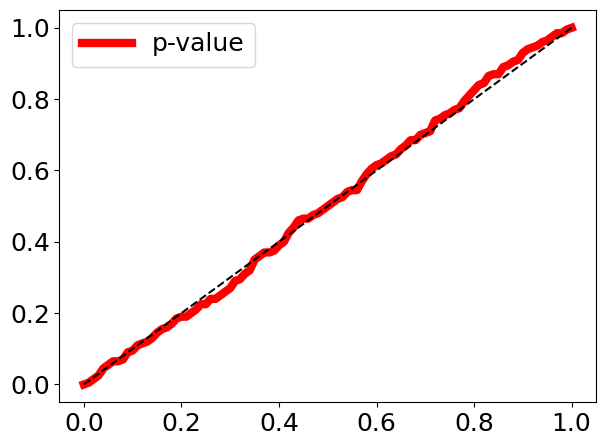

In [6]:
kstest = scipy.stats.kstest(list_p_value, 'uniform')
print(f"False positive rate: {FPR}")
print(f'Uniform check (KS-Test result): {kstest.pvalue}')

plt.rcParams.update({'font.size': 18})
grid = np.linspace(0, 1, 101)
plt.plot(grid, sm.distributions.ECDF(np.array(list_p_value))(grid), 'r-', linewidth=6, label='p-value')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.tight_layout()
plt.show()